# Análise de dados com Pandas e Seaborn

A base de dados utilizada aqui é de churn de clientes de uma empresa de telecomunicações. O churn é uma métrica que indica a taxa de evasão de clientes. Neste caso, o churn é definido como a perda de clientes para a concorrência ou por desinteresse em continuar com o serviço. O objetivo é analisar os dados e identificar os principais fatores que levam um cliente a cancelar o serviço.

Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não



,id_cliente,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,...,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,7590-VHVEG,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,5575-GNVDE,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,...,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,3668-QPYBK,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,...,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,7795-CFOCW,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,...,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,9237-HQITU,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


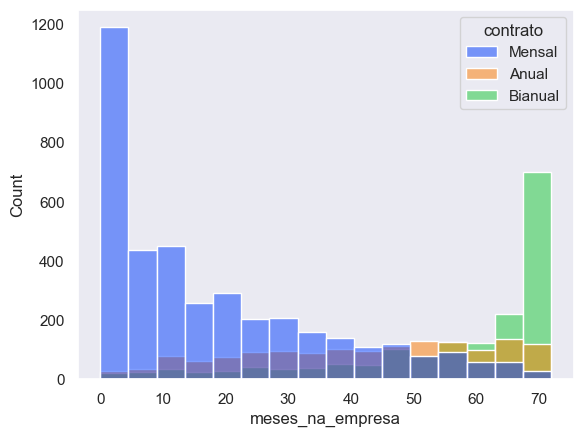

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ARQUIVO_DADOS = './assets/churn_clientes.csv'

sns.set_theme(style='dark', palette='bright', context='notebook')
sns.histplot(x='meses_na_empresa', data=df_churn, hue='contrato');

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn.head()

In [6]:
df_churn = df_churn.drop(columns='id_cliente', axis=1)
df_churn.head()

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


In [4]:
colunas_numericas = df_churn.select_dtypes(include='number').columns

print(colunas_numericas)

Index(['meses_na_empresa', 'valor_mensal', 'total_gasto'], dtype='object')


In [5]:
colunas_categoricas = df_churn.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')

print(colunas_categoricas)

Index(['id_cliente', 'genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')


## Análise das variáveis numéricas

### Histograma
Um histograma é uma representação gráfica da distribuição de frequências de uma variável. Ele é um gráfico de barras onde cada barra representa uma classe ou intervalo de uma classe e a área de cada barra é proporcional à frequência da classe. O histograma é uma ferramenta útil para visualizar a forma da distribuição de uma variável. Ele permite identificar a presença de assimetria e a presença de outliers.

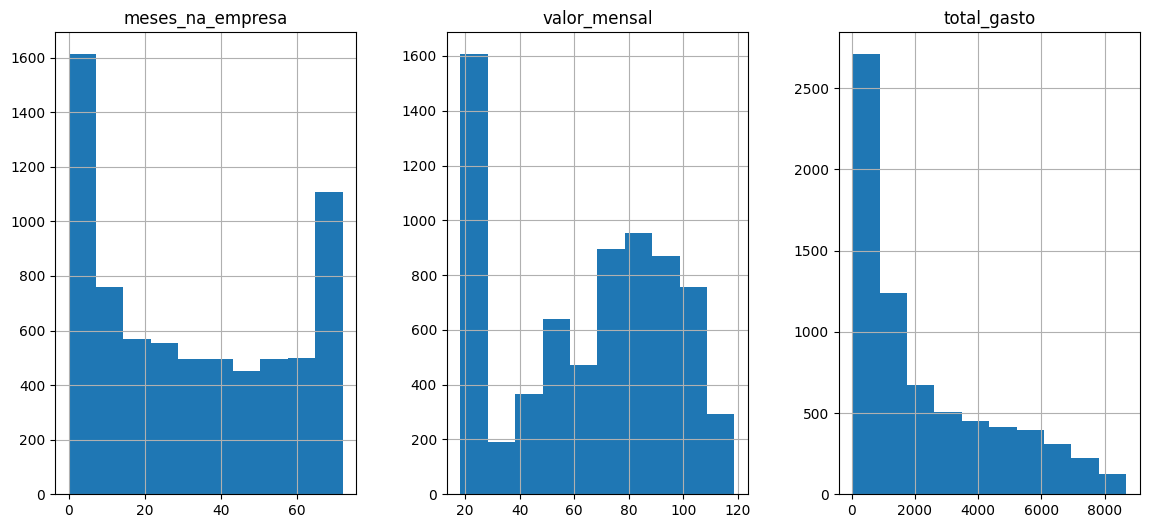

In [20]:
df_churn[colunas_numericas].hist(layout=(1, 3), figsize=(14, 6));

In [24]:
df_churn['meses_na_empresa'].value_counts(bins=10).sort_index()

(-0.073, 7.2]    1612
(7.2, 14.4]       759
(14.4, 21.6]      570
(21.6, 28.8]      556
(28.8, 36.0]      545
(36.0, 43.2]      444
(43.2, 50.4]      452
(50.4, 57.6]      495
(57.6, 64.8]      501
(64.8, 72.0]     1109
Name: count, dtype: int64

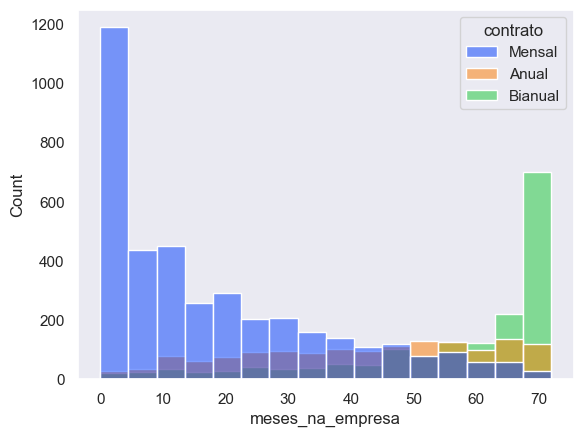

In [29]:
sns.set_theme(style='dark', palette='bright', context='notebook')
sns.histplot(x='meses_na_empresa', data=df_churn, hue='contrato');

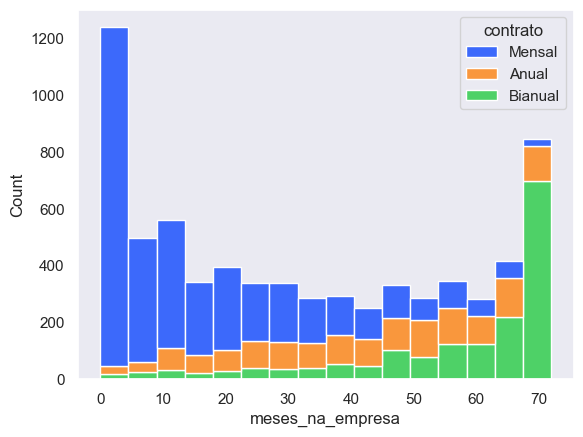

In [30]:
sns.histplot(x='meses_na_empresa', data=df_churn, hue='contrato', multiple='stack');

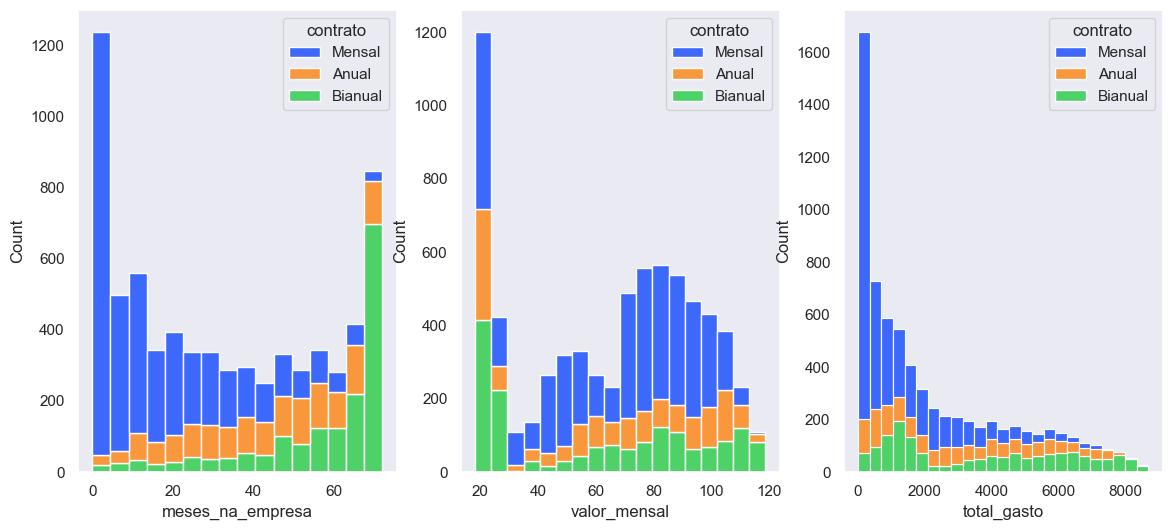

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna, data=df_churn, hue='contrato', multiple='stack', ax=axs[i])

plt.show()

## Análise das variáveis numéricas

## KDE

Um outro gráfico muito útil é o `kdeplot`, que é um gráfico de densidade de kernel. Ele é uma estimativa da distribuição de probabilidade de uma variável contínua. Ele é muito útil para visualizar a forma da distribuição de uma variável e comparar a distribuição de duas variáveis.

Para entender o KDE, primeiro precisamos entender o que é uma distribuição de dados. Quando coletamos dados, muitas vezes queremos saber como estes estão distribuídos. Por exemplo, se coletarmos as alturas de todas as pessoas em uma cidade, podemos querer saber se a maioria das pessoas é muito alta ou muito baixa. Uma maneira comum de visualizar a distribuição de dados é através de um histograma, que divide os dados em intervalos e mostra quantos pontos de dados caem em cada intervalo.

No entanto, os histogramas podem ser um pouco brutos, porque dependem de como escolhemos os intervalos. Aqui é onde o KDE entra. Em vez de contar o número de pontos de dados em intervalos fixos, o KDE coloca uma pequena "colina" sobre cada ponto de dados, e então soma todas essas "colinas" para criar uma "paisagem" suave que mostra a distribuição dos dados. A largura das "colinas" é determinada por um parâmetro chamado largura de banda (*bandwidth*), que pode ser usado para ajustar a suavidade do KDE.

Em resumo, um gráfico KDE é uma maneira de visualizar a distribuição de um conjunto de dados que fornece uma visão mais suave e menos dependente da escolha dos intervalos do que um histograma.

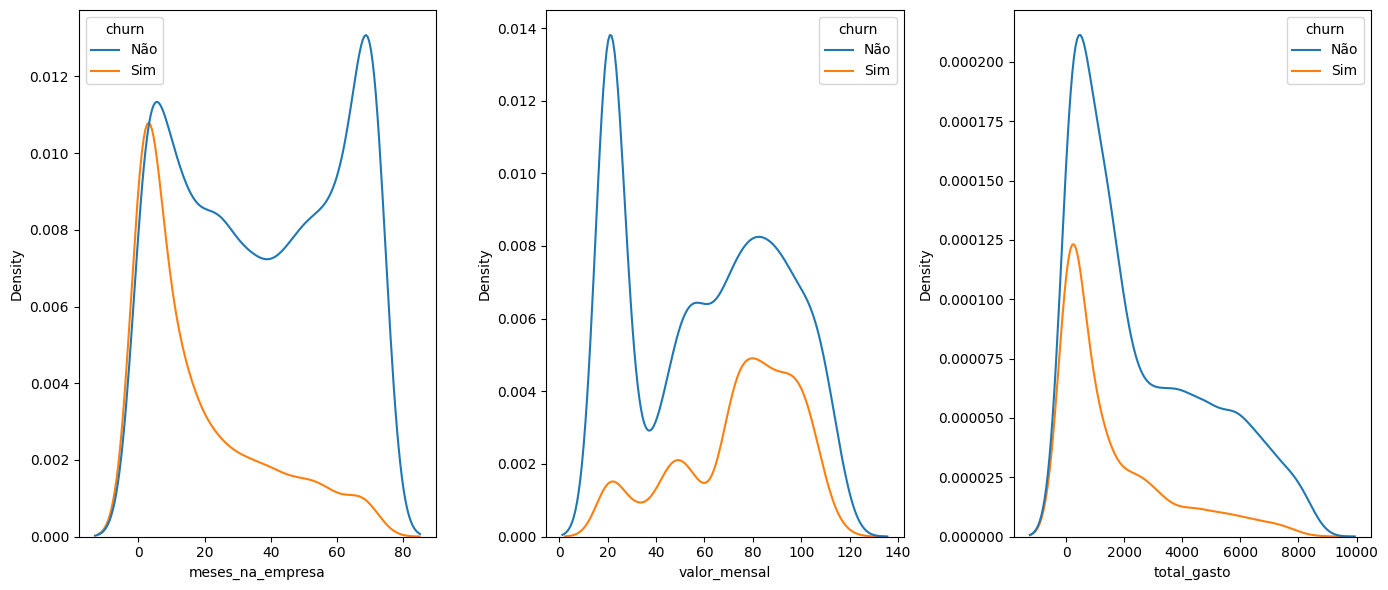

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), tight_layout=True)

for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna, data=df_churn, hue='churn', ax=axs[i])

plt.show()

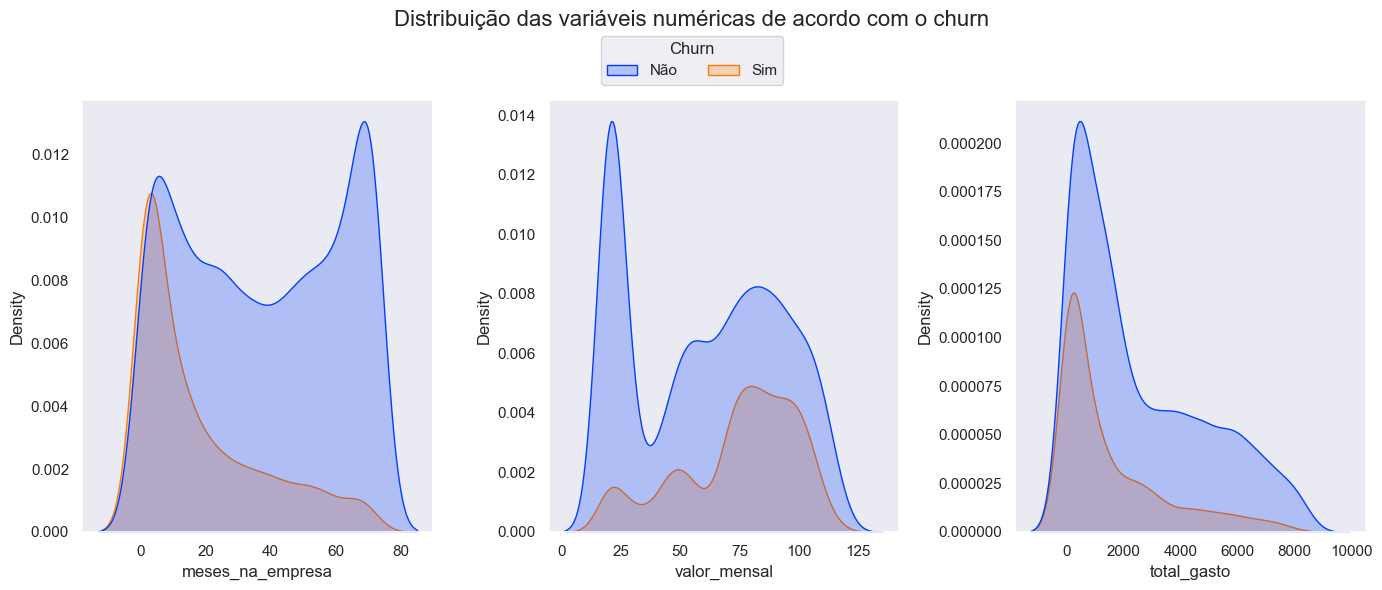

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), tight_layout=True)

for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna, data=df_churn, hue='churn', ax=axs[i], fill=True)
    legenda = axs[i].get_legend()
    legenda.remove()

rotulos = [text.get_text() for text in legenda.get_texts()]

fig.legend(handles=legenda.legend_handles, labels=rotulos, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.95))
fig.suptitle('Distribuição das variáveis numéricas de acordo com o churn\n\n', fontsize=16)

plt.show()

## Análise das variáveis numéricas

### Facetgrid

O Seaborn possui uma funcionalidade chamada `FacetGrid`, que permite criar uma matriz de gráficos com base em características de um conjunto de dados. Esta matriz é chamada de grid e cada gráfico individual é chamado de "facet".

A ideia por trás é permitir visualizar a distribuição ou a relação de uma variável em diferentes subconjuntos, que podem ser definidos por variáveis categóricas.

O seaborn também possui uma função chamada `map_dataframe`, que permite aplicar uma função de plotagem a cada facet do grid. Por exemplo, podemos criar um grid com 3 colunas, uma para cada tipo de contrato. Em cada coluna, podemos plotar um histograma da variável `meses_na_empresa`. Dessa forma, podemos comparar a distribuição da variável `meses_na_empresa` de acordo com o tipo de contrato.

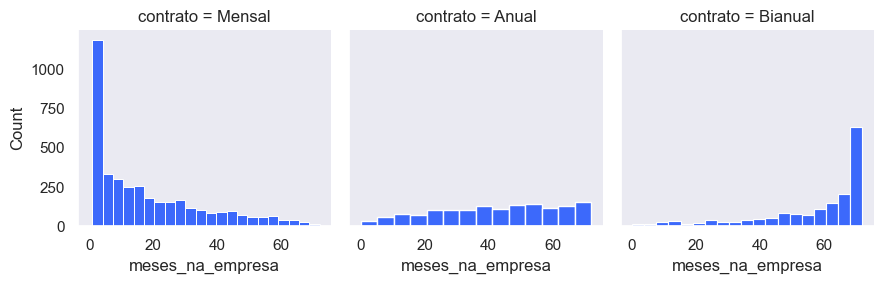

In [27]:
g = sns.FacetGrid(df_churn, col='contrato')
g.map_dataframe(sns.histplot, x='meses_na_empresa')
plt.show()

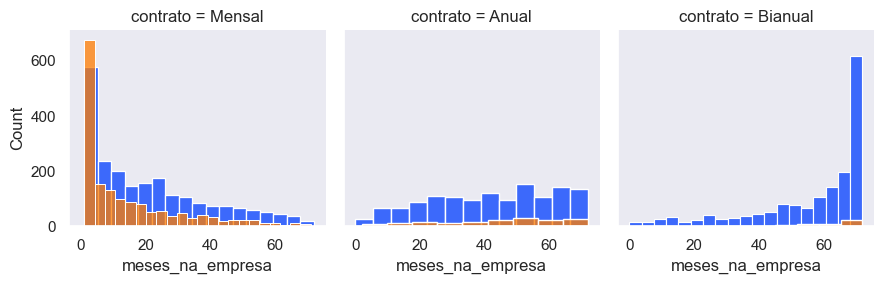

In [28]:
g = sns.FacetGrid(df_churn, col='contrato', hue='churn')
g.map_dataframe(sns.histplot, x='meses_na_empresa')
plt.show()

Grids mais elaborados podem ser criados. Por exemplo, com o parâmetro `hue`, podemos separar os dados de acordo com a variável `churn`. Dessa forma, podemos comparar a distribuição da variável `meses_na_empresa` de acordo com o tipo de contrato e se o cliente cancelou o serviço no mês anterior.

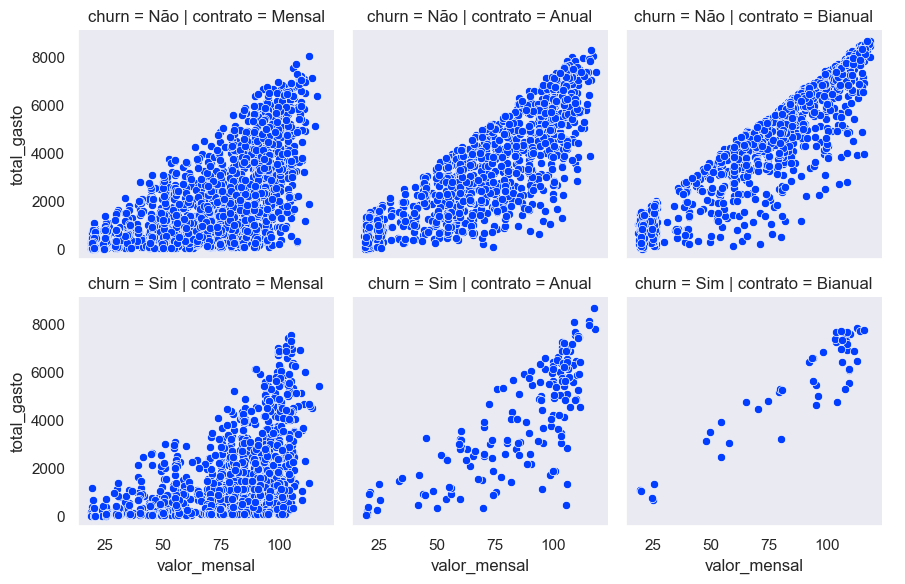

In [32]:
g = sns.FacetGrid(df_churn, col='contrato', row='churn')
g.map_dataframe(sns.scatterplot, x='valor_mensal', y='total_gasto')
g.add_legend()
plt.show()

## PairPlot

O Seaborn tambem possui uma função chamada pairplot. que cria um grid com scatterplots de todas as variáveis numéricas de um conjunto de dados. Além disso, os gráficos na diagonal principal são histogramas ou KDE das variáveis numéricas.

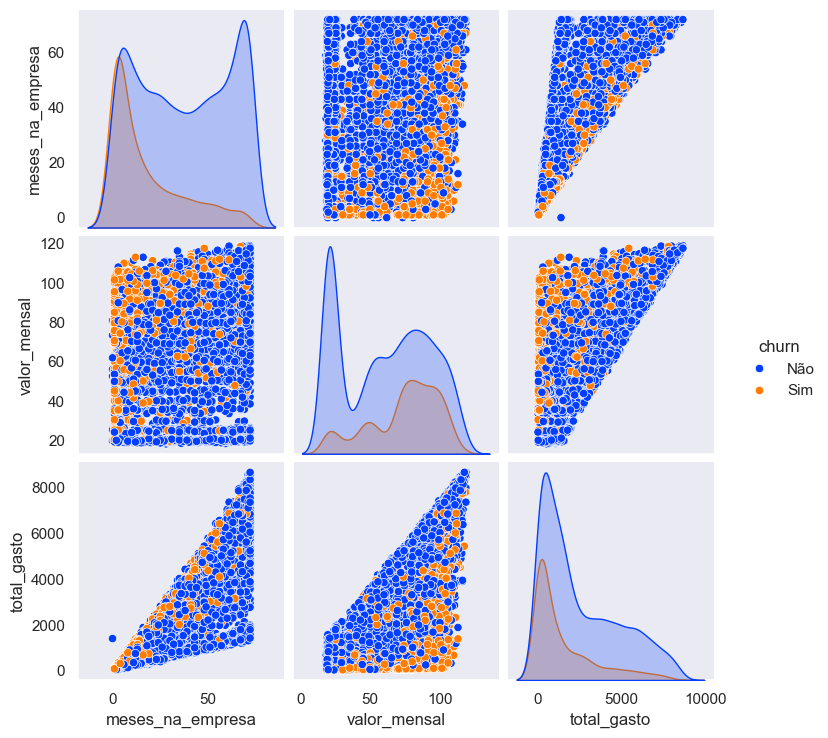

In [34]:
sns.pairplot(data=df_churn, hue='churn')

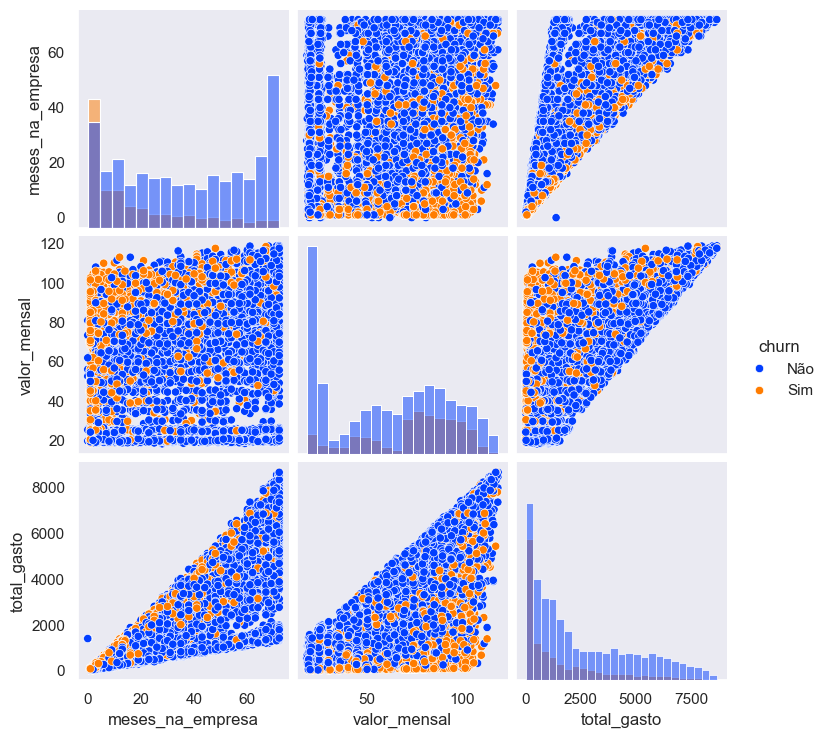

In [36]:
sns.pairplot(data=df_churn, hue='churn', diag_kind='hist');